<h3>
Supervised Machine Learning with Tree Based Models

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np

In [3]:
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

In [4]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

In [6]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [7]:
df.tail()

,date,state,cured,deaths,confirmed
858,2020-04-11,Telengana,43,9,504
859,2020-04-11,Tripura,0,0,2
860,2020-04-11,Uttarakhand,5,0,35
861,2020-04-11,Uttar Pradesh,32,4,433
862,2020-04-11,West Bengal,16,5,126


In [16]:
date1 = df[df.date == '2020-04-11']

In [17]:
date1

,date,state,cured,deaths,confirmed
832,2020-04-11,Andhra Pradesh,11,6,381
833,2020-04-11,Andaman and Nicobar Islands,0,0,11
834,2020-04-11,Arunachal Pradesh,0,0,1
835,2020-04-11,Assam,0,1,29
836,2020-04-11,Bihar,0,1,60
837,2020-04-11,Chandigarh,7,0,18
838,2020-04-11,Chhattisgarh,9,0,18
839,2020-04-11,Delhi,25,14,903
840,2020-04-11,Goa,1,0,7
841,2020-04-11,Gujarat,31,19,308


In [18]:
#Sorting data w.r.t number of confirmed cases
max_confirmed_cases=date1.sort_values(by="confirmed",ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
850,2020-04-11,Maharashtra,188,110,1574
857,2020-04-11,Tamil Nadu,44,8,911
839,2020-04-11,Delhi,25,14,903
856,2020-04-11,Rajasthan,21,3,553
858,2020-04-11,Telengana,43,9,504
849,2020-04-11,Madhya Pradesh,0,33,443
861,2020-04-11,Uttar Pradesh,32,4,433
832,2020-04-11,Andhra Pradesh,11,6,381
847,2020-04-11,Kerala,123,2,364
841,2020-04-11,Gujarat,31,19,308


In [19]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]

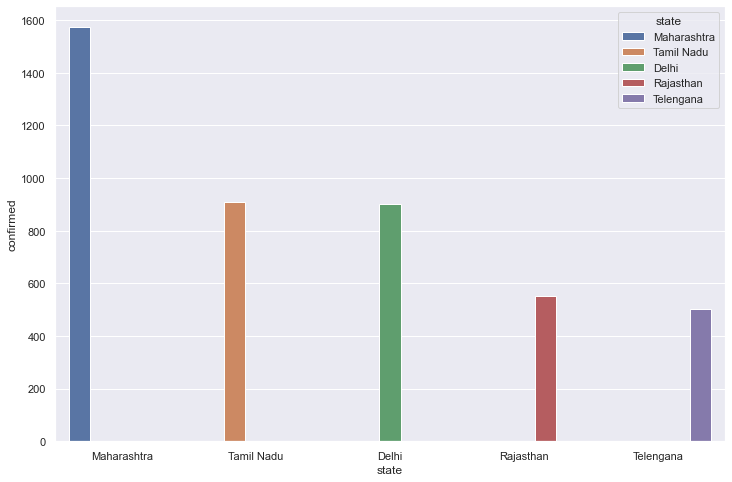

In [22]:
#Making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [24]:
#Sorting data w.r.t number of death cases
max_death_cases=date1.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
850,2020-04-11,Maharashtra,188,110,1574
849,2020-04-11,Madhya Pradesh,0,33,443
841,2020-04-11,Gujarat,31,19,308
839,2020-04-11,Delhi,25,14,903
855,2020-04-11,Punjab,5,11,132
858,2020-04-11,Telengana,43,9,504
857,2020-04-11,Tamil Nadu,44,8,911
832,2020-04-11,Andhra Pradesh,11,6,381
846,2020-04-11,Karnataka,37,6,214
862,2020-04-11,West Bengal,16,5,126


In [25]:
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:5]

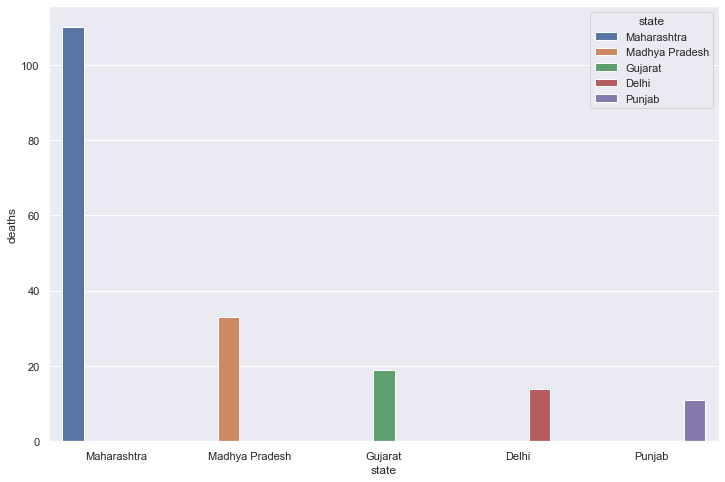

In [27]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

In [30]:
#Sorting data w.r.t number of cured cases
max_cured_cases=date1.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
850,2020-04-11,Maharashtra,188,110,1574
847,2020-04-11,Kerala,123,2,364
857,2020-04-11,Tamil Nadu,44,8,911
858,2020-04-11,Telengana,43,9,504
846,2020-04-11,Karnataka,37,6,214
861,2020-04-11,Uttar Pradesh,32,4,433
841,2020-04-11,Gujarat,31,19,308
842,2020-04-11,Haryana,29,3,177
839,2020-04-11,Delhi,25,14,903
856,2020-04-11,Rajasthan,21,3,553


In [31]:
#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:5]

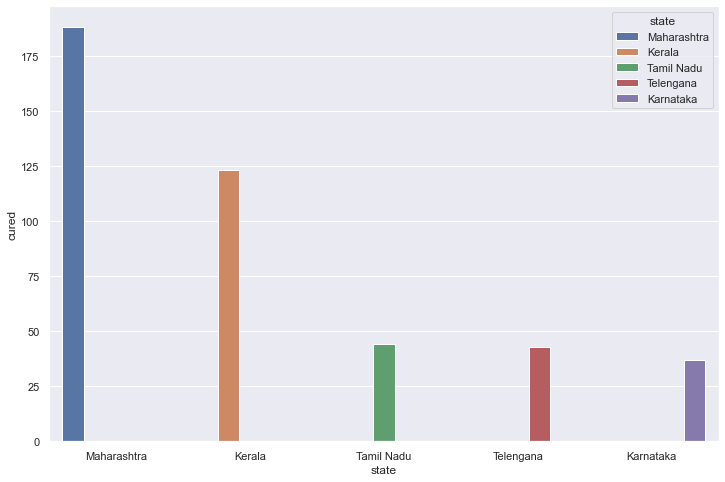

In [33]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

In [34]:
#Maharashtra
maha = df[df.state == 'Maharashtra']

In [35]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
146,2020-03-14,Maharashtra,0,0,14
153,2020-03-15,Maharashtra,0,0,32
167,2020-03-16,Maharashtra,0,0,32
182,2020-03-17,Maharashtra,0,1,39
197,2020-03-18,Maharashtra,0,1,42


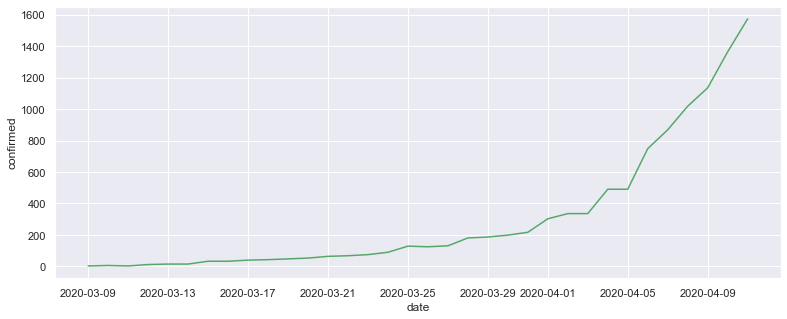

In [51]:
#Visualizing confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(13,5)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

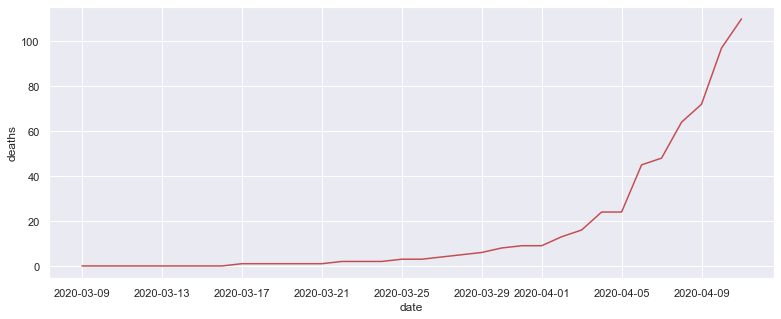

In [50]:
#Visualizing death cases in maharashtra
sns.set(rc={'figure.figsize':(13,5)})
sns.lineplot(x="date",y="deaths",data=maha,color="r")
plt.show()

In [40]:
#kerala
kerala= df[df.state == 'Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
723,2020-04-07,Kerala,58,2,327
754,2020-04-08,Kerala,70,2,336
785,2020-04-09,Kerala,83,2,345
816,2020-04-10,Kerala,96,2,357


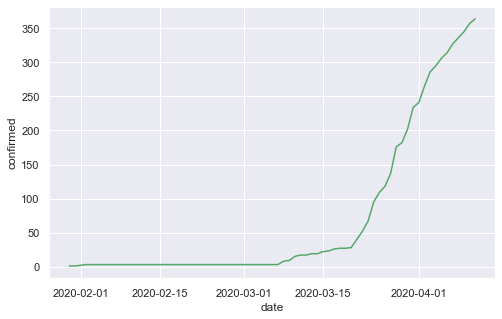

In [42]:
#Visualizing confirmed cases in Kerala
sns.set(rc={'figure.figsize':(8,5)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")
plt.show()

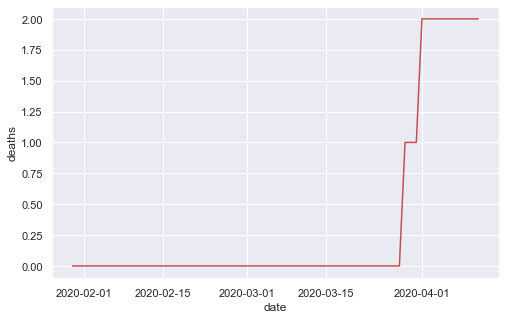

In [43]:
#Visualizing death cases in Kerala
sns.set(rc={'figure.figsize':(8,5)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")
plt.show()

In [44]:
#Jammu and Kashmir
jk= df[df.state == 'Jammu and Kashmir']
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
143,2020-03-14,Jammu and Kashmir,0,0,2
158,2020-03-15,Jammu and Kashmir,0,0,2
173,2020-03-16,Jammu and Kashmir,0,0,3
188,2020-03-17,Jammu and Kashmir,0,0,3
204,2020-03-18,Jammu and Kashmir,0,0,3


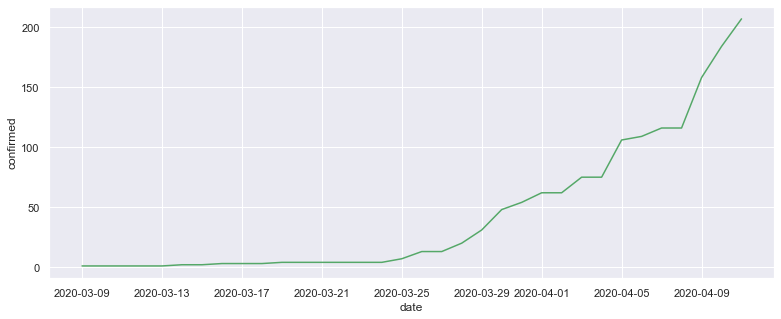

In [49]:
#Visualizing confirmed cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(13,5)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")
plt.show()

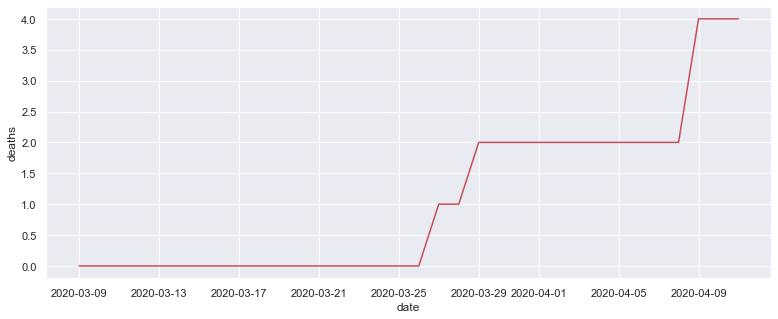

In [54]:
#Visualizing death cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(13,5)})
sns.lineplot(x="date",y="deaths",data=jk,color="r")
plt.show()

In [57]:
#Linear regression
from sklearn.model_selection import train_test_split

In [58]:
#converting date-time to ordinal
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

<ipython-input-58-669bfd237a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [59]:
#getting dependent variable and inpedent variable
x=maha['date']
y=maha['confirmed']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
dtr = RandomForestRegressor()

In [63]:
y_train

575     335
97        2
280      67
235      52
120      11
91        5
350     128
757    1018
146      14
546     302
605     335
788    1135
850    1574
257      63
434     180
516     216
636     490
76        2
215      47
153      32
696     748
167      32
488     198
Name: confirmed, dtype: int64

In [64]:
dtr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

<ipython-input-64-8c30e9b16811>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


RandomForestRegressor()

In [65]:
maha.tail()

,date,state,cured,deaths,confirmed
726,737522,Maharashtra,56,48,868
757,737523,Maharashtra,79,64,1018
788,737524,Maharashtra,117,72,1135
819,737525,Maharashtra,125,97,1364
850,737526,Maharashtra,188,110,1574


In [66]:
dtr.predict(np.array([[737625]]))

array([1371.86])